### <font color='red'>AI003 - Preprocess the Text and Create Text Embeddings</font>

In [ ]:
#test 'train_test_split'
X = unified_data['text']
y = unified_data['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, stratify = y)   #'stratify' argument ensures same class proportions for each split

https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [ ]:
#convert two classes to new binary id column
unified_data['gender_id'] = unified_data['gender']
unified_data['gender_id'].replace(['male', 'female'], [0, 1], inplace = True)
print(unified_data[unified_data['gender'] == 'male'].head(3))
print(unified_data[unified_data['gender'] == 'female'].head(3))

                                                   text gender  len_text  \
4457  holy moly! josh brown guest starred in the sho...   male        99   
4458  jim colver has been serving the residents of a...   male        74   
4459  born in cleveland, ford was luckily taken by t...   male       104   

      gender_id  
4457          0  
4458          0  
4459          0  
                                                text  gender  len_text  \
0   danielle frenkel is a high jumper born in israel  female        48   
1  tania mihailuk is a politician who was born in...  female        56   
2  juliet taylor is a woman who works as a castin...  female        56   

   gender_id  
0          1  
1          1  
2          1  


In [ ]:
#import sklearn stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = list(ENGLISH_STOP_WORDS)
print(stop_words)
print(len(stop_words))
my_stop_words = stop_words.copy()

#to add stop words, e.g.
#my_stop_words = text.ENGLISH_STOP_WORDS.union(["book"])

word_remove = ['he', 'she', 'him', 'her', 'hers', 'his', 'himself', 'herself']
for i in my_stop_words:
    if i in word_remove:
        my_stop_words.remove(i)

print('-'*100)
print(my_stop_words)
print(len(my_stop_words))

my_stop_words = frozenset(my_stop_words)
type(my_stop_words)

['than', 'will', 'off', 'itself', 'one', 'namely', 'several', 'our', 'from', 'myself', 'whereafter', 'alone', 'everywhere', 'about', 'whereby', 'against', 'fifteen', 'being', 'already', 'himself', 'seemed', 'any', 'together', 'are', 'bill', 'yourself', 'afterwards', 'even', 'since', 'mostly', 'have', 'yours', 'hereafter', 'de', 'find', 'me', 'also', 'his', 'towards', 'thick', 'seem', 'someone', 'everything', 'or', 'co', 'perhaps', 'mine', 'always', 'he', 'ten', 'your', 'has', 'there', 'do', 'ourselves', 'whither', 'thereby', 'herself', 'next', 'describe', 'among', 'whatever', 'couldnt', 'rather', 'indeed', 'four', 'i', 'again', 'keep', 'still', 'we', 'yet', 'top', 'call', 'done', 'whom', 'an', 'latterly', 'each', 'as', 'ours', 'anywhere', 'twenty', 'not', 'out', 'before', 'own', 'put', 'five', 'must', 'other', 'eg', 'themselves', 'nobody', 'never', 'it', 'take', 'what', 'con', 'after', 'can', 'you', 'nothing', 'meanwhile', 'in', 'three', 'twelve', 'etc', 'eight', 'empty', 'toward', 'le

frozenset

In [ ]:
def stop_words_search(string):
        if string in stop_words:
            print('yes, present in stop words list')
        else:
            print('no, not present in stop words list')
            
stop_words_search('man')
stop_words_search('woman')
stop_words_search('girl')
stop_words_search('boy')

no, not present in stop words list
no, not present in stop words list
no, not present in stop words list
no, not present in stop words list


In [ ]:
unified_data.head()

,text,gender,len_text,gender_id
0,danielle frenkel is a high jumper born in israel,female,48,1
1,tania mihailuk is a politician who was born in...,female,56,1
2,juliet taylor is a woman who works as a castin...,female,56,1
3,margaret caroline rudd was born in britain. sh...,female,78,1
4,retta scott was an american artist who died in...,female,51,1


In [ ]:
type(unified_data['text'])

pandas.core.series.Series

In [ ]:
import nltk
#https://www.nltk.org/data.html   instructions for manual download
#https://www.nltk.org/nltk_data/
#SLL cert error so need to download manually from above website then move into relevant subfolder of /usr/local/share/nltk_data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [ ]:
#https://courses.cs.duke.edu/spring14/compsci290/assignments/lab02.html
#https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

from nltk.tokenize import word_tokenize   #requires nltk.download('punkt') but SSL cert error
from nltk.tokenize import TreebankWordTokenizer   #equivalent to word_tokenize just doesn't require a download
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

#remove punctuation from texts
#unified_data['text'] = unified_data['text'].str.replace(r'[^\w\s]+', '')

#regex here already removes punctuation
#regex here includes tokens that have at least one letter, removing numbers from consideration (can be used in token_pattern argument too)
regexp = RegexpTokenizer(u'(?ui)\\b\\w*[a-z]+\\w*\\b')

unified_data['text_token']=unified_data['text'].apply(regexp.tokenize)

#count = Counter(tokens)
#print(count.most_common(10))

print('BEFORE stopwords filter\n', unified_data['text_token'].head())
#remove stopwords
unified_data['text_token'] = unified_data['text_token'].apply(lambda x: [item for item in x if item not in my_stop_words])
print('AFTER stopwords filter\n', unified_data['text_token'].head())

#keep only words longer than 1 characters
unified_data['text_string'] = unified_data['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>1]))

#create list of all words
all_words = ' '.join([word for word in unified_data['text_string']])

#tokenize all_words
#tokenizer = TreebankWordTokenizer()
#tokenized_words = tokenizer.tokenize(all_words)
tokenized_words = word_tokenize(all_words)

#create a frequency distribution which records the number of times each word has occurred:
fdist = FreqDist(tokenized_words)
fdist

BEFORE stopwords filter
 0    [danielle, frenkel, is, a, high, jumper, born,...
1    [tania, mihailuk, is, a, politician, who, was,...
2    [juliet, taylor, is, a, woman, who, works, as,...
3    [margaret, caroline, rudd, was, born, in, brit...
4    [retta, scott, was, an, american, artist, who,...
Name: text_token, dtype: object
AFTER stopwords filter
 0      [danielle, frenkel, high, jumper, born, israel]
1       [tania, mihailuk, politician, born, australia]
2    [juliet, taylor, woman, works, casting, director]
3    [margaret, caroline, rudd, born, britain, she,...
4               [retta, scott, american, artist, died]
Name: text_token, dtype: object


FreqDist({'her': 950, 'she': 704, 'his': 606, 'he': 582, 'born': 555, 'american': 470, 'great': 388, 'like': 351, 'known': 299, 'amazing': 281, ...})

In [ ]:
#search specific words
fdist["americans"]

6

In [ ]:
fdist.most_common(10)

[('her', 950),
 ('she', 704),
 ('his', 606),
 ('he', 582),
 ('born', 555),
 ('american', 470),
 ('great', 388),
 ('like', 351),
 ('known', 299),
 ('amazing', 281)]

In [ ]:
fdist.tabulate(15)

     her      she      his       he     born american    great     like    known  amazing  actress     work   player     love     best 
     950      704      606      582      555      470      388      351      299      281      272      263      257      247      245 


<AxesSubplot:>

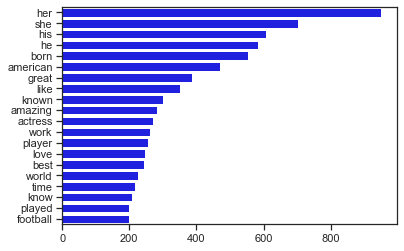

In [ ]:
# Obtain top 10 words
n = 20
top_n = fdist.most_common(n)

# Create pandas series to make plotting easier
fdist_pseries = pd.Series(dict(top_n))

import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist_pseries.index, x=fdist_pseries.values, color='blue')

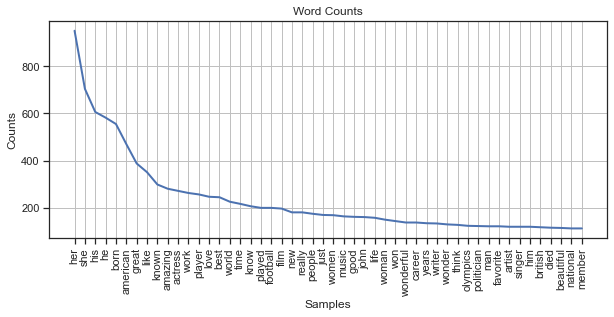

<AxesSubplot:title={'center':'Word Counts'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
#plot top 50
from matplotlib.pyplot import figure
figure(figsize=(10, 4))
fdist.plot(50, title = 'Word Counts')

In [ ]:
import plotly.express as px

fig = px.bar(y=fdist_pseries.index, x=fdist_pseries.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

In [ ]:
#Now we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4)
#argument in Tfidfvectorizer that does the same
unified_data['text_string_fdist'] = unified_data['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 3 ]))

Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

unified_data['text_string_lem'] = unified_data['text_string_fdist'].apply(wordnet_lem.lemmatize)

#sometimes no words to lemmatize so can compare two columns to verify
#check if the columns are equal
unified_data['is_equal']=(unified_data['text_string_fdist']==unified_data['text_string_lem'])
print(unified_data.is_equal.value_counts())

True     8911
False       3
Name: is_equal, dtype: int64


In [ ]:
unified_data.head()

,text,gender,len_text,gender_id,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,danielle frenkel is a high jumper born in israel,female,48,1,"[danielle, frenkel, high, jumper, born, israel]",danielle frenkel high jumper born israel,danielle high born israel,danielle high born israel,True
1,tania mihailuk is a politician who was born in...,female,56,1,"[tania, mihailuk, politician, born, australia]",tania mihailuk politician born australia,politician born australia,politician born australia,True
2,juliet taylor is a woman who works as a castin...,female,56,1,"[juliet, taylor, woman, works, casting, director]",juliet taylor woman works casting director,juliet taylor woman works casting director,juliet taylor woman works casting director,True
3,margaret caroline rudd was born in britain. sh...,female,78,1,"[margaret, caroline, rudd, born, britain, she,...",margaret caroline rudd born britain she notori...,margaret caroline born britain she notorious f...,margaret caroline born britain she notorious f...,True
4,retta scott was an american artist who died in...,female,51,1,"[retta, scott, american, artist, died]",retta scott american artist died,scott american artist died,scott american artist died,True


In [ ]:
#prep for word cloud
all_words_lem = ' '.join([word for word in unified_data['text_string_lem']])
all_words_lem[0:1000]

'danielle high born israel politician born australia juliet taylor woman works casting director margaret caroline born britain she notorious female scott american artist died mary barker fantasy illustrator flowers worked malay activist fought hard women children rights singapore feel gratitude evelyn she helped women land army world war ii paved way peace born february austria actress amy thomson hard science fiction writing feminist pamela scored her best bowling figure women cricket world cup eileen somewhat popular actress tv personality having appeared love novel bloody jack amazing story girl london man love dr moira marvel comics know comes polish born charles work wall history successful african american history consider his greatest achievement great reality television series graced air starting june mary years old her skin used judge her love watching teen miss usa pageants colorful ellis amazing women she women proud julie katherine british legal scholar academic administrat

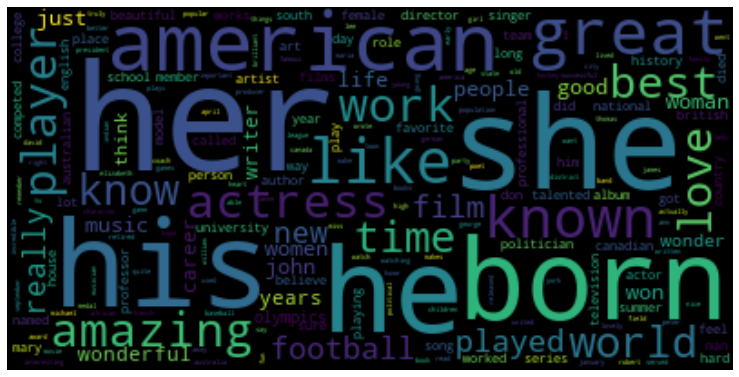

In [ ]:
%matplotlib inline

#word cloud using frequencies to infer word sizing
#convert FreqDict object to dictionary
fdist_dict = dict(fdist)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=fdist_dict)
plt.figure(figsize=(13, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
unified_data = unified_data[['text_string_lem', 'gender_id', 'gender']]
unified_data.head(3)

,text_string_lem,gender_id,gender
0,danielle high born israel,1,female
1,politician born australia,1,female
2,juliet taylor woman works casting director,1,female


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#cv = CountVectorizer()

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf = TfidfVectorizer(max_features = 10000, 
                        max_df=0.5, 
                        encoding='utf-8', 
                        ngram_range=(1, 3), 
                        stop_words=None,   #already done above
                        lowercase = True,   #already done above
                        token_pattern = u'(?ui)\\b\\w*[a-z]+\\w*\\b',   #same as before
                        use_idf = True)

#X = cv.fit_transform(unified_data['text_string_lem']).toarray()
X = tfidf.fit_transform(unified_data['text_string_lem']).toarray()
y = unified_data['gender_id']

#stratify = y should only be used for imbalanced classes but this has already been corrected so no need but wil artificially improve especialy if one class more easy to classify than another
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2) 

print('percentage data that is TRAIN:', round((len(X_train)/len(unified_data))*100, 2))
print('percentage data that is TEST:', round((len(X_test)/len(unified_data))*100, 2))

percentage data that is TRAIN: 80.0
percentage data that is TEST: 20.0


In [ ]:
#text transformed via TfidVectorizer function to matrix of numbers that model will understand
X[0:4]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#feature_names = cv.get_feature_names_out()
feature_names = tfidf.get_feature_names_out()
print(feature_names)
print('-'*50)
print('Number of features extracted:', len(feature_names))

['11th' '13th' '15th' ... 'zoey' 'zone' 'zoo']
--------------------------------------------------
Number of features extracted: 10000
